# ETL Smoke Test

## Running the code in the test files

In [24]:
from pathlib import Path
import pandas as pd
from metro_disruptions_intelligence.etl.static_ingest import ingest_static_gtfs
from metro_disruptions_intelligence.etl.ingest_rt import ingest_all_rt, union_all_feeds
import matplotlib.pyplot as plt

In [25]:
project_root = Path.cwd()
if not (project_root / "sample_data").exists():
    project_root = project_root.parent

In [26]:
processed = project_root / "data" / "processed"
static_dir = project_root / "data" / "static"
rt_dir = project_root / "sample_data" / "rt"

In [27]:
static_out = ingest_static_gtfs(static_dir, processed / "static")
ingest_all_rt(rt_dir, processed / "rt")
union_all_feeds(processed / "rt", processed / "station_event.parquet")

WindowsPath('c:/Users/Luis.ParraMorales/GitProjects/metro_disruptions_intelligence/data/processed/station_event.parquet')

In [28]:
df = pd.read_parquet(processed / "station_event.parquet")
df.head()

,snapshot_timestamp,alert_entity_id,active_period_start,active_period_end,agency_id,route_id,direction_id,cause,effect,header_text,...,arrival_delay,departure_delay,latitude,longitude,bearing,speed,current_stop_sequence,current_status,congestion_level,occupancy_status
0,1743461951,cbd2e2c2-d0e1-5727-950d-99f78d6ffe31,1.743591e+09,1.743606e+09,SMNW,SMNW_M1,1,9,6,"Metro services run between Tallawong, Martin P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
1,1743461951,cbd2e2c2-d0e1-5727-950d-99f78d6ffe31,1.743591e+09,1.743606e+09,SMNW,SMNW_M1,0,9,6,"Metro services run between Tallawong, Martin P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2,1743461951,3854a373-b4cb-5cd5-a977-a01679b970b7,1.743779e+09,1.743955e+09,SMNW,SMNW_M1,1,9,6,Train trackwork on the T1 North Shore Line and...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
3,1743461951,3854a373-b4cb-5cd5-a977-a01679b970b7,1.743779e+09,1.743955e+09,SMNW,SMNW_M1,0,9,6,Train trackwork on the T1 North Shore Line and...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
4,1743461951,72cf39c4-c201-546a-a926-2708489444cd,1.744027e+09,1.744042e+09,SMNW,SMNW_M1,1,9,6,"Metro services run between Tallawong, Martin P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [29]:
df['feed_type'].value_counts()

feed_type
trip_updates         1356
vehicle_positions      27
alerts                 12
Name: count, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   snapshot_timestamp     1395 non-null   int64  
 1   alert_entity_id        12 non-null     object 
 2   active_period_start    12 non-null     float64
 3   active_period_end      12 non-null     float64
 4   agency_id              12 non-null     object 
 5   route_id               1395 non-null   object 
 6   direction_id           1395 non-null   int64  
 7   cause                  12 non-null     object 
 8   effect                 12 non-null     object 
 9   header_text            12 non-null     object 
 10  description_text       12 non-null     object 
 11  url                    12 non-null     object 
 12  year                   1395 non-null   int64  
 13  month                  1395 non-null   int64  
 14  day                    1395 non-null   int64  
 15  feed

In [31]:
df.columns

Index(['snapshot_timestamp', 'alert_entity_id', 'active_period_start',
       'active_period_end', 'agency_id', 'route_id', 'direction_id', 'cause',
       'effect', 'header_text', 'description_text', 'url', 'year', 'month',
       'day', 'feed_type', 'trip_id', 'start_time', 'start_date', 'vehicle_id',
       'stop_sequence', 'stop_id', 'arrival_time', 'departure_time',
       'arrival_delay', 'departure_delay', 'latitude', 'longitude', 'bearing',
       'speed', 'current_stop_sequence', 'current_status', 'congestion_level',
       'occupancy_status'],
      dtype='object')

## Sanity checks and exploration

### Basic Snaity Checks

In [32]:
print(project_root)

c:\Users\Luis.ParraMorales\GitProjects\metro_disruptions_intelligence


In [33]:
processed = project_root / "data" / "processed"
static_df = pd.read_parquet(processed / "static" / "station_schedule.parquet")
rt_df = pd.read_parquet(processed / "station_event.parquet")

In [34]:
static_df.columns

Index(['trip_id', 'service_id', 'route_id', 'stop_id', 'sched_arr',
       'sched_dep', 'stop_sequence'],
      dtype='object')

In [35]:
static_df.head()

,trip_id,service_id,route_id,stop_id,sched_arr,sched_dep,stop_sequence
0,1.AA51.1-SC0-1-sj2-3.1.R,AA51+1,1-SC0-1-sj2-3,254111,82200,82200,1
1,1.AA51.1-SC0-1-sj2-3.1.R,AA51+1,1-SC0-1-sj2-3,253572,83040,83040,2
2,1.AA51.1-SC0-1-sj2-3.1.R,AA51+1,1-SC0-1-sj2-3,253476,84000,84000,3
3,1.AA51.1-SC0-1-sj2-3.1.R,AA51+1,1-SC0-1-sj2-3,253332,84600,84600,4
4,1.AA56.1-16S-C-sj2-1.2.R,AA56+1,1-16S-C-sj2-1,251593,13680,13680,1


In [36]:
print(rt_df.feed_type.value_counts())

feed_type
trip_updates         1356
vehicle_positions      27
alerts                 12
Name: count, dtype: int64


In [37]:
print(rt_df.snapshot_timestamp.min(), rt_df.snapshot_timestamp.max())

1743461951 1743461997


### Verify trip updates against static schedule

In [38]:
tu = rt_df[rt_df.feed_type == "trip_updates"].copy()

# ensure same type for merge columns
tu["stop_id"] = tu["stop_id"].astype(str)
static_df["stop_id"] = static_df["stop_id"].astype(str)

merged = tu.merge(
    static_df,
    on=["trip_id", "stop_id", "stop_sequence"],
    how="left",
    suffixes=("", "_sched"),
)


In [39]:
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   snapshot_timestamp     1356 non-null   int64  
 1   alert_entity_id        0 non-null      object 
 2   active_period_start    0 non-null      float64
 3   active_period_end      0 non-null      float64
 4   agency_id              0 non-null      object 
 5   route_id               1356 non-null   object 
 6   direction_id           1356 non-null   int64  
 7   cause                  0 non-null      object 
 8   effect                 0 non-null      object 
 9   header_text            0 non-null      object 
 10  description_text       0 non-null      object 
 11  url                    0 non-null      object 
 12  year                   1356 non-null   int64  
 13  month                  1356 non-null   int64  
 14  day                    1356 non-null   int64  
 15  feed

In [40]:
# Calculate arrival difference from scheduled arrival
merged["arrival_diff"] = merged["arrival_time"] - merged["sched_arr"]
print(merged["arrival_diff"].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: arrival_diff, dtype: float64


<Axes: title={'center': 'Arrival delay (seconds)'}, ylabel='Frequency'>

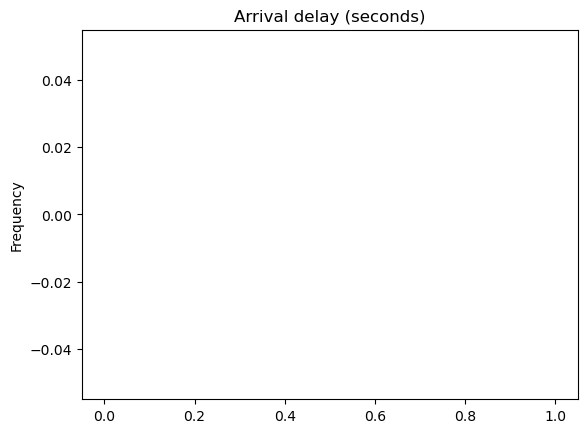

In [41]:
# Plot arrival delay distribution
merged["arrival_diff"].plot.hist(bins=20, title="Arrival delay (seconds)")